In [ ]:
#import all the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#loading the dataset
df=pd.read_csv("/content/housing.csv")

In [ ]:
#viewing and analysing the dataset
print(df.head())
print(df.tail())
print(df.shape)
print(df.dtypes)
print(df.columns)
print(df.info())
print(df.isnull())
print(df.describe())
print(df.isnull().sum())
print(df.isnull().sum().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms

In [ ]:
#make all the columns numerical for easy analysis-label encoder used
le=LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])
print(df['ocean_proximity'])

#total bedroom have null values so inorder to not lose rows we have taken the median into account
median_value = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_value, inplace=True)

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int64


/tmp/ipython-input-6-3996130398.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_value, inplace=True)


In [ ]:
#assigning values
x=df.drop("median_house_value",axis=1)  #every column except median_house_value taken as independent variable
y=df[["median_house_value"]]

In [ ]:
#splitting into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512, 1)
(4128, 1)


In [ ]:
#model training
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#prediction of data
y_pred=model.predict(x_test)
print(y_pred)

[[ 63642.87562829]
 [154445.82484212]
 [252777.76132137]
 ...
 [439690.11277371]
 [130408.05181885]
 [175513.56755483]]


In [ ]:
#evaluation of data using metrics
r2=r2_score(y_test,y_pred)
print(r2)

0.613706888649953


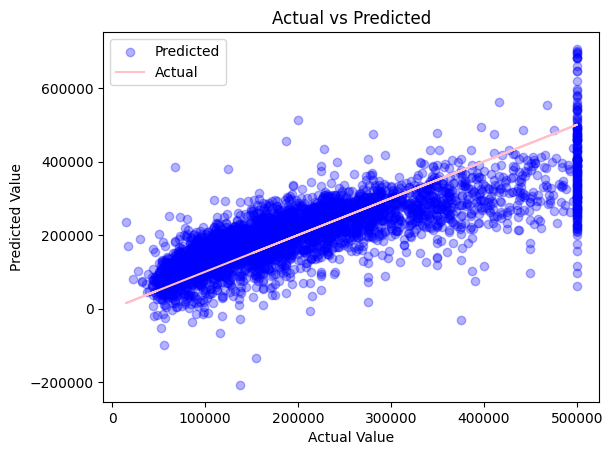

In [ ]:
#plot actual value as line and predicted value as scattered
plt.scatter(y_test, y_pred, color='blue', label='Predicted',alpha=0.3)
plt.plot(y_test, y_test, color='pink', label='Actual')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
#live prediction
# Get the user input for all the columns
longitude = float(input("Enter longitude: "))
latitude = float(input("Enter latitude: "))
housing_median_age = float(input("Enter housing median age: "))
total_rooms = float(input("Enter total rooms: "))
total_bedrooms = float(input("Enter total bedrooms: "))
population = float(input("Enter population: "))
households = float(input("Enter number of households: "))
median_income = float(input("Enter median income: "))
ocean_proximity = int(input("Enter ocean proximity (0=INLAND, 1=<1H OCEAN, etc.): "))

# Create DataFrame using the inputs taken
user_input = pd.DataFrame([[longitude, latitude, housing_median_age,
                            total_rooms, total_bedrooms, population,
                            households, median_income, ocean_proximity]],
                          columns=x.columns)

# Predict
predicted_price = model.predict(user_input)
print(predicted_price)

Enter longitude: 100
Enter latitude: 200
Enter housing median age: 21
Enter total rooms: 2
Enter total bedrooms: 2
Enter population: 2
Enter number of households: 2
Enter median income: 1500
Enter ocean proximity (0=INLAND, 1=<1H OCEAN, etc.): 0
[[44404288.60566144]]
